In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 3. 공기오염도 조사

#### 3.1공기오염도 관련 데이터 가져오기

In [2]:
air_quality_2019 = pd.read_csv('./files/ad_viz_plotval_data_2019.csv')
air_quality_2019 = air_quality_2019.loc[:, ['Date', 'Daily Mean PM2.5 Concentration']]
box_plot_df = air_quality_2019
air_quality_2019.head()

,Date,Daily Mean PM2.5 Concentration
0,01/03/2019,5.3
1,01/06/2019,5.9
2,01/09/2019,3.0
3,01/12/2019,4.3
4,01/15/2019,12.0


In [3]:
air_quality_2019['Date'] = pd.to_datetime(air_quality_2019['Date'])
air_quality_2019 = air_quality_2019.set_index('Date', drop=True)
air_quality_2019.head()

,Daily Mean PM2.5 Concentration
Date,
2019-01-03,5.3
2019-01-06,5.9
2019-01-09,3.0
2019-01-12,4.3
2019-01-15,12.0


In [4]:
air_quality_2020 = pd.read_csv('./files/ad_viz_plotval_data_2020.csv')
air_quality_2020 = air_quality_2020.loc[:, ['Date', 'Daily Mean PM2.5 Concentration']]
box_plot_df_2020 = air_quality_2020
air_quality_2020.head()

,Date,Daily Mean PM2.5 Concentration
0,01/01/2020,1.9
1,01/04/2020,9.6
2,01/07/2020,5.0
3,01/10/2020,5.2
4,01/13/2020,4.0


In [5]:
air_quality_2020['Date'] = pd.to_datetime(air_quality_2020['Date'])
air_quality_2020 = air_quality_2020.set_index('Date', drop=True)
air_quality_2020.head()

,Daily Mean PM2.5 Concentration
Date,
2020-01-01,1.9
2020-01-04,9.6
2020-01-07,5.0
2020-01-10,5.2
2020-01-13,4.0


#### 3.2 resample 함수를 이용하여 매월 평균적으로 초미세먼지 양 확인

In [6]:
air_quality_2019 = air_quality_2019.resample(rule='M').mean()
air_quality_2019.head()

,Daily Mean PM2.5 Concentration
Date,
2019-01-31,9.356051
2019-02-28,9.153846
2019-03-31,7.777019
2019-04-30,5.877622
2019-05-31,5.428477


In [7]:
air_quality_2020 = air_quality_2020.resample(rule='M').mean()
air_quality_2020.head()

,Daily Mean PM2.5 Concentration
Date,
2020-01-31,7.973206
2020-02-29,7.375887
2020-03-31,5.068677
2020-04-30,4.243284
2020-05-31,3.777638


#### 3.3 matplotlib 을 이용하여 박스 테이블 시각화

Text(0.5, 1.0, '2019 Monthly PM2.5 Concentration')

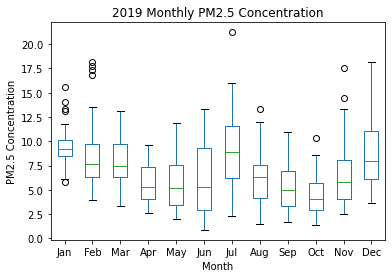

In [8]:
s = box_plot_df.groupby(box_plot_df['Date']).mean().sort_values('Date')
s = s.reset_index()
arr2d = []
columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
for month in range(12):
    l = list(s[s['Date'].astype(str).str.startswith("2019-"+str(month+1).zfill(2))]['Daily Mean PM2.5 Concentration'])
    for i in range(len(l),31,1):
        l.append( np.NaN )
    arr = np.array(l)
    arr2d.append(arr)
    
arr2d = np.array(arr2d).transpose()
boxplot = pd.DataFrame(arr2d, columns=columns)

aq_2019_boxplot = boxplot.boxplot(column=columns, grid=False)
aq_2019_boxplot.set_ylabel('PM2.5 Concentration')
aq_2019_boxplot.set_xlabel('Month')
aq_2019_boxplot.set_title('2019 Monthly PM2.5 Concentration')

Text(0.5, 1.0, '2020 Monthly PM2.5 Concentration')

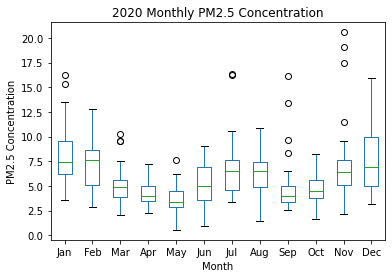

In [9]:
s = box_plot_df_2020.groupby(box_plot_df_2020['Date']).mean().sort_values('Date')
s = s.reset_index()
arr2d20 = []
columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
for month in range(12):
    l = list(s[s['Date'].astype(str).str.startswith("2020-"+str(month+1).zfill(2))]['Daily Mean PM2.5 Concentration'])
    for i in range(len(l),31,1):
        l.append( np.NaN )
    arr = np.array(l)
    arr2d20.append(arr)
    
arr2d20 = np.array(arr2d20).transpose()
boxplot20 = pd.DataFrame(arr2d20, columns=columns)

aq_2020_boxplot = boxplot20.boxplot(column=columns, grid=False)
aq_2020_boxplot.set_ylabel('PM2.5 Concentration')
aq_2020_boxplot.set_xlabel('Month')
aq_2020_boxplot.set_title('2020 Monthly PM2.5 Concentration')

##### 3.3.1 Seaborn을 사용한 시각화 비교분석 (box plot)

In [11]:
monthly_plot = {}
months = []
years = []
days = []
pms = []

months2019 = []
months2020 = []
pms2019 = []
pms2020 = []

for month in range(12):
    arr = np.array(boxplot.iloc[:,month])
    months.extend([columns[month]]*len(arr))
    months2019.extend([columns[month]]*len(arr))
    pms.extend([x for x in arr])
    pms2019.extend([x for x in arr])
    years.extend([2019]*len(arr))
    days.extend([i+1 for i in range(len(arr))])

for month in range(12):
    arr = np.array(boxplot20.iloc[:,month])
    months.extend([columns[month]]*len(arr))
    months2020.extend([columns[month]]*len(arr))
    pms.extend([x for x in arr])
    pms2020.extend([x for x in arr])
    years.extend([2020]*len(arr))

aq2019_df = df = pd.DataFrame({
    'Month': months2019,
    'PM2.5': pms2019,
    'Day': days
})

aq2020_df = df = pd.DataFrame({
    'Month': months2020,
    'PM2.5': pms2020,
    'Day': days
})

df = pd.DataFrame({
    'Month': months,
    'PM2.5': pms,
    'year': years
})

df

,Month,PM2.5,year
0,Jan,9.500000,2019
1,Jan,11.566667,2019
2,Jan,8.462500,2019
3,Jan,13.325000,2019
4,Jan,10.125000,2019
...,...,...,...
739,Dec,10.312000,2020
740,Dec,9.380000,2020
741,Dec,5.048780,2020
742,Dec,6.026923,2020


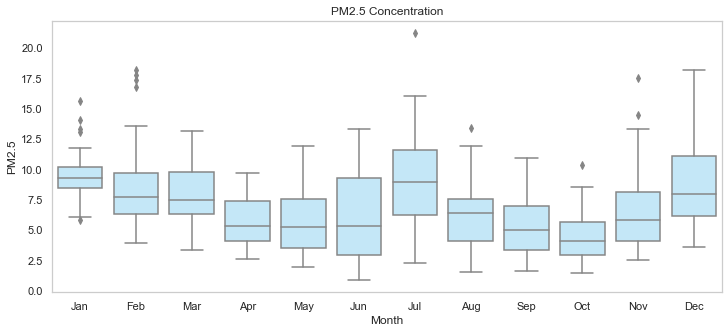

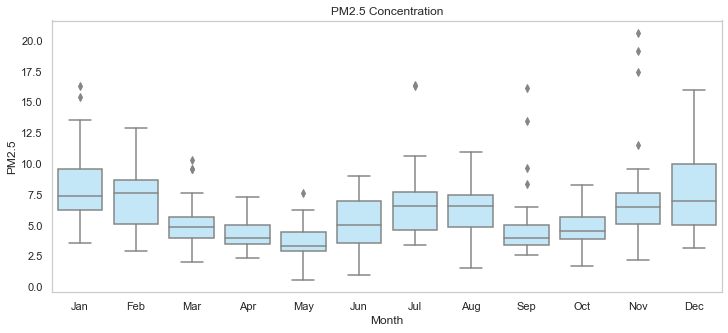

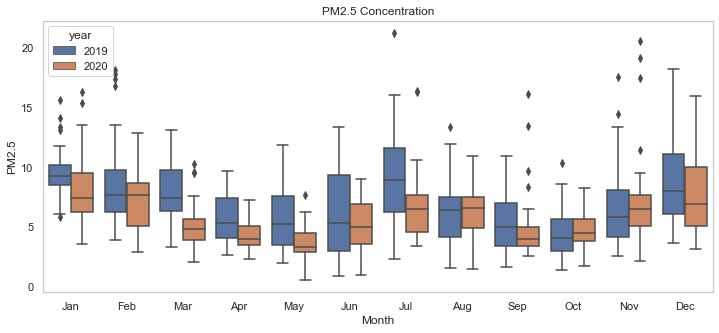

In [14]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(data=boxplot, color='#bbeaff')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('PM2.5 Concentration')
plt.show()
sns.boxplot(data=boxplot20, color='#bbeaff')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('PM2.5 Concentration')
plt.show()
sns.set(rc={'figure.figsize':(12,5)})

sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(data=df, hue='year',x='Month',y='PM2.5')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('PM2.5 Concentration')
plt.show()

#### 3.3.2 Seaborn을 이용한 시각화 비교분석 (heatmap)

In [412]:
aq2020_pv = aq2020_df.pivot("Day", "Month", "PM2.5")
aq2019_pv = aq2019_df.pivot("Day", "Month", "PM2.5")
aq2020_pv = aq2020_pv[columns]
aq2019_pv = aq2019_pv[columns]

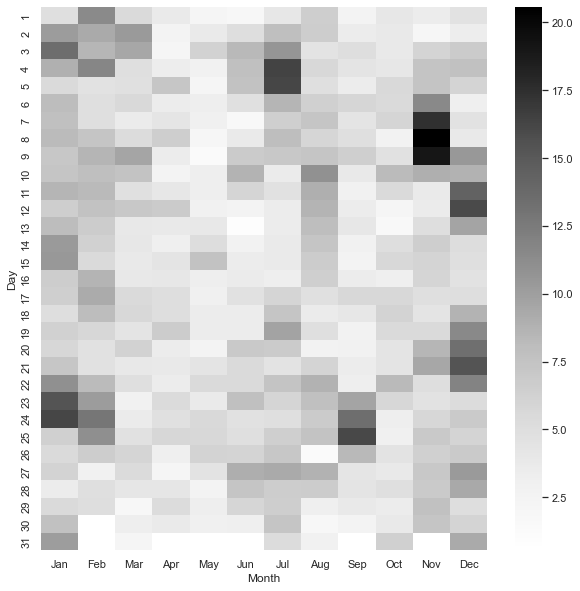

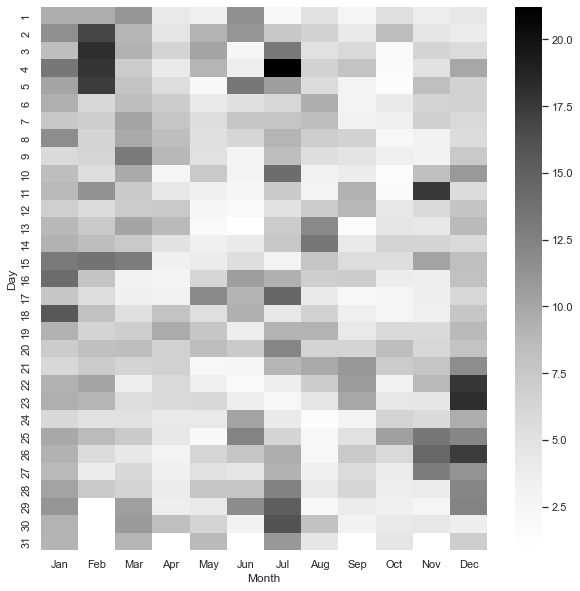

In [413]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(aq2020_pv, annot=False, fmt="f", cmap='Greys')

plt.figure(figsize=(10, 10))
ax = sns.heatmap(aq2019_pv, annot=False, fmt="f", cmap='Greys')

#### 3.3.3 Matplotlib을 이용한 시각화 비교분석 (line graph)

In [17]:
air_quality_total =pd.concat([air_quality_2019, air_quality_2020], keys=['2019yr', '2020yr'])
air_quality_total.head()

Daily Mean PM2.5 Concentration
       Date                                      
2019yr 2019-01-31                        9.356051
       2019-02-28                        9.153846
       2019-03-31                        7.777019
       2019-04-30                        5.877622
       2019-05-31                        5.428477

In [18]:
air_quality_total['year'] = [2019]*12 + [2020]*12
table = pd.pivot_table(air_quality_total, values='Daily Mean PM2.5 Concentration', columns=['year'],
                        aggfunc=np.mean)
table

year,2019,2020
Daily Mean PM2.5 Concentration,7.098749,5.985835


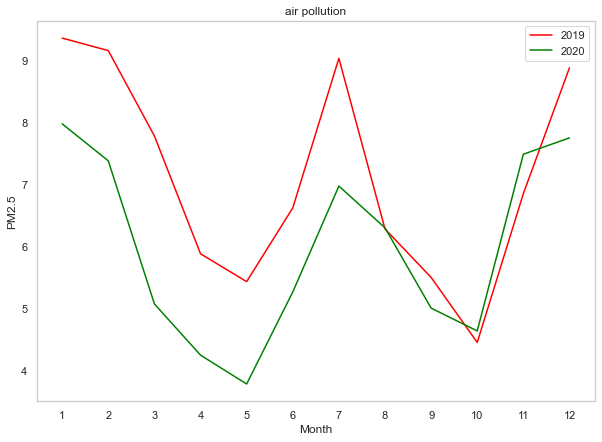

In [19]:
f, ax = plt.subplots(figsize = (10, 7))

x1 = list(range(1, 13, 1))
y1 = air_quality_total.loc['2019yr', 'Daily Mean PM2.5 Concentration']
y2 = air_quality_total.loc['2020yr', 'Daily Mean PM2.5 Concentration']
plt.plot(x1, y1, color = 'red', label='2019')
plt.plot(x1, y2, color = 'green', label='2020')
plt.xlabel('Month')
plt.ylabel('PM2.5')
ax.set_title('air pollution')
ax.set_xticks(x1)
ax.legend()

plt.show()

### 4. 공기오염도와 택시 사용량의 관계도 분석

#### 4.1 모든 택시 데이터 가져오기

In [20]:
pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2020-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data20 = pd.concat(pieces, ignore_index=False)

pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2019-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data19 = pd.concat(pieces, ignore_index=False)

taxi_data19.head()
taxi_total =pd.concat([taxi_data19, taxi_data20], keys=['2019yr', '2020yr'])
taxi_total

C:\ProgramData\Anaconda\envs\playdata\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


passenger_count  trip_distance
       Month                                
2019yr 1             831685.0     2169650.07
       2             752145.0     2018287.43
       3             781886.0     2076818.64
       4             675613.0     1542114.00
       5             659808.0     1503938.94
       6             620846.0     1402742.90
       7             566946.0     1563070.18
       8             520140.0     1566423.54
       9             511536.0     1580697.81
       10            506322.0     1688128.25
       11            476779.0     1300109.95
       12            472041.0     1552421.19
2020yr 1             432598.0     1611699.55
       2             416441.0     1957195.76
       3             230152.0     1583166.10
       4              27436.0      334410.77
       5              36938.0     2167916.17
       6              47702.0     2893105.98
       7              53381.0     5635425.36
       8              59516.0     4410949.82
       9              62946.0     1137951.42
       10             68920.0     2575677.91
       11             62505.0     3556166.15
       12             58752.0     2121961.00

#### 4.2 모든 데이터 합치기

In [21]:
a = air_quality_total.reset_index()[["Date", "Daily Mean PM2.5 Concentration"]]
a['Date']=[date[:7] for date in list(np.array(a['Date'].astype(str)))]
a

,Date,Daily Mean PM2.5 Concentration
0,2019-01,9.356051
1,2019-02,9.153846
2,2019-03,7.777019
3,2019-04,5.877622
4,2019-05,5.428477
5,2019-06,6.617361
6,2019-07,9.029457
7,2019-08,6.277586
8,2019-09,5.496396
9,2019-10,4.447826


In [22]:
dates = []
taxi_data19_d = taxi_data19.reset_index()['Month']
taxi_data20_d = taxi_data20.reset_index()['Month']
for m in taxi_data19_d:
    d = "2019-" + str(m).zfill(2)
    dates.append(d)
taxi_data19['Date']=np.array(dates)

dates = []
for m in taxi_data20_d:
    d = "2020-" + str(m).zfill(2)
    dates.append(d)

taxi_data20['Date']=np.array(dates)

In [23]:
taxi_data19 = taxi_data19.reset_index()
taxi_data20 = taxi_data20.reset_index()
print(taxi_data19)
print(taxi_data20)

    Month  passenger_count  trip_distance     Date
0       1         831685.0     2169650.07  2019-01
1       2         752145.0     2018287.43  2019-02
2       3         781886.0     2076818.64  2019-03
3       4         675613.0     1542114.00  2019-04
4       5         659808.0     1503938.94  2019-05
5       6         620846.0     1402742.90  2019-06
6       7         566946.0     1563070.18  2019-07
7       8         520140.0     1566423.54  2019-08
8       9         511536.0     1580697.81  2019-09
9      10         506322.0     1688128.25  2019-10
10     11         476779.0     1300109.95  2019-11
11     12         472041.0     1552421.19  2019-12
    Month  passenger_count  trip_distance     Date
0       1         432598.0     1611699.55  2020-01
1       2         416441.0     1957195.76  2020-02
2       3         230152.0     1583166.10  2020-03
3       4          27436.0      334410.77  2020-04
4       5          36938.0     2167916.17  2020-05
5       6          47702.0     

In [24]:
taxi_data19 = taxi_data19.drop(['Month'],axis=1)
taxi_data20 = taxi_data20.drop(['Month'],axis=1)

#### 4.3 공기오염도와 택시 데이터 Merge하기

In [25]:
aq_total_simple = a
taxi_total_simple = pd.concat([taxi_data19, taxi_data20], axis=0)
taxi_aq = pd.merge(taxi_total_simple,aq_total_simple, on='Date', how='inner')
taxi_aq

,passenger_count,trip_distance,Date,Daily Mean PM2.5 Concentration
0,831685.0,2169650.07,2019-01,9.356051
1,752145.0,2018287.43,2019-02,9.153846
2,781886.0,2076818.64,2019-03,7.777019
3,675613.0,1542114.00,2019-04,5.877622
4,659808.0,1503938.94,2019-05,5.428477
5,620846.0,1402742.90,2019-06,6.617361
6,566946.0,1563070.18,2019-07,9.029457
7,520140.0,1566423.54,2019-08,6.277586
8,511536.0,1580697.81,2019-09,5.496396
9,506322.0,1688128.25,2019-10,4.447826


#### 4.4 데이터 시각화

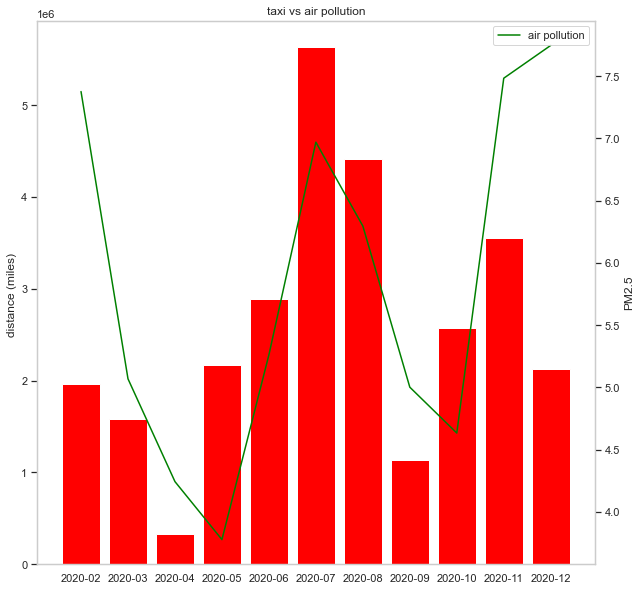

In [27]:
f, ax = plt.subplots(figsize = (10, 10))
ax2 = ax.twinx()
x1 = taxi_aq['Date'][13:]
y1 = taxi_aq['trip_distance'][13:]
y2 = taxi_aq['Daily Mean PM2.5 Concentration'][13:]
ax.bar(x1, y1, color = 'red', label='taxi')
ax2.plot(x1,  y2, color = 'green', label='air pollution')
ax.set_title('taxi vs air pollution')
ax2.set_ylabel("PM2.5")
ax.set_ylabel('distance (miles) ')
# ax.set_xticks(np.arange(0,25,4))
plt.legend()

plt.show()